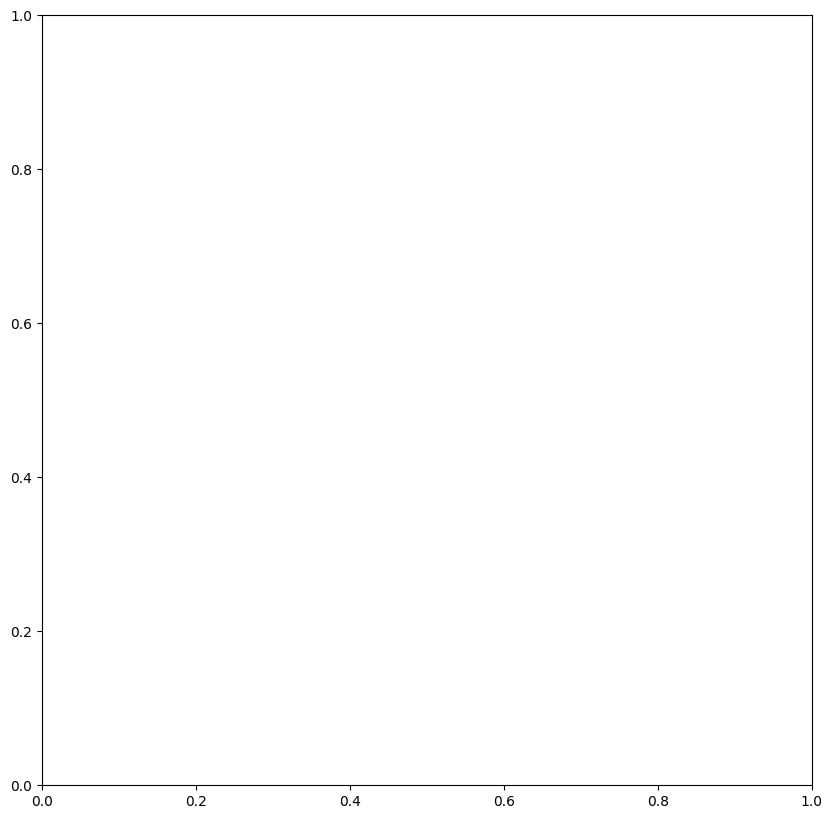

In [21]:
import numpy as np
import matplotlib.pyplot as plt

dx = 5
dy = 5

Lx = 100
Ly = 100

class node:
    def __init__(self):
        self.Cell_size_x = dx
        self.Cell_size_y = dy
        self.Gx = None  # Center X
        self.Gy = None  # Center Y
        self.edge_color = "blue"

# Create mesh
mesh = np.array([[node() for x in range(int(Lx/dx))] for y in range(int(Ly/dy))])

def stretch_one_point(arr, index, percent):
    """Stretch/squeeze one element of arr by % and adjust others to preserve sum"""
    arr = arr.copy()
    total = sum(arr)

    # Stretch the chosen point
    increase = arr[index] * (percent / 100.0)
    arr[index] += increase

    # Distribute decrease across other elements
    decrease = increase / (len(arr) - 1)
    for i in range(len(arr)):
        if i != index:
            arr[i] -= decrease

    # Fix floating-point mismatch
    diff = total - sum(arr)
    arr[index] += diff
    return arr

def update_mesh_geometry(mesh, Lx, Ly):
    """Recompute Gx and Gy centers after resizing"""
    Ny, Nx = mesh.shape
    
    # X direction
    for y in range(Ny):
        current_x = 0
        for x in range(Nx):
            mesh[y][x].Gx = current_x + mesh[y][x].Cell_size_x/2.0
            current_x += mesh[y][x].Cell_size_x

    # Y direction
    for x in range(Nx):
        current_y = 0
        for y in range(Ny):
            mesh[y][x].Gy = current_y + mesh[y][x].Cell_size_y/2.0
            current_y += mesh[y][x].Cell_size_y

def stretch_mesh(mesh, axis, index, percent):
    """
    axis = 'x' or 'y'
    index = index to stretch/squeeze
    percent = +ve (stretch), -ve (squeeze)
    """
    Ny, Nx = mesh.shape
    
    if axis == 'x':
        x_array = [mesh[0][x].Cell_size_x for x in range(Nx)]
        stretched = stretch_one_point(x_array, index, percent)
        for x in range(Nx):
            for y in range(Ny):
                mesh[y][x].Cell_size_x = stretched[x]

    elif axis == 'y':
        y_array = [mesh[y][0].Cell_size_y for y in range(Ny)]
        stretched = stretch_one_point(y_array, index, percent)
        for y in range(Ny):
            for x in range(Nx):
                mesh[y][x].Cell_size_y = stretched[y]

    update_mesh_geometry(mesh, Lx, Ly)


# Initial uniform mesh
update_mesh_geometry(mesh, Lx, Ly)

# Example: squeeze 5th column in x-direction by 50%
stretch_mesh(mesh, axis='x', index=5, percent=-50)

# Example: stretch 10th row in y-direction by 100%
stretch_mesh(mesh, axis='y', index=10, percent=100)


# Plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect("equal")

for y in range(mesh.shape[0]):
    for x in range(mesh.shape[1]):
        cell = mesh[y][x]
        rect = plt.Rectangle((cell.Gx - cell.Cell_size_x/2,
                              cell.Gy - cell.Cell_size_y/2),
                             cell.Cell_size_x, cell.Cell_size_y,
                             linewidth=0.5, edgecolor=cell.edge_color, facecolor='none')
        ax.add_patch(rect)

plt.show()

In [16]:
for x, y in zip(np.meshgrid(x, y)[1]):
    print(x,y)

ValueError: not enough values to unpack (expected 2, got 1)

In [19]:
len(np.meshgrid(x, y)[1][0])

20